<a href="https://colab.research.google.com/github/Lynxlazy/genomics-data-analysis/blob/main/Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0. Create directories

In [1]:
!mkdir Project1
%cd Project1
!mkdir raw
%cd raw 

/content/Project1
/content/Project1/raw


# 1. Get the Data

In [2]:
!wget https://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000/005/845/GCF_000005845.2_ASM584v2/GCF_000005845.2_ASM584v2_genomic.fna.gz
!wget https://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000/005/845/GCF_000005845.2_ASM584v2/GCF_000005845.2_ASM584v2_genomic.gff.gz
!wget https://figshare.com/ndownloader/files/23769689
!wget https://figshare.com/ndownloader/files/23769692

--2023-02-28 08:47:39--  https://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000/005/845/GCF_000005845.2_ASM584v2/GCF_000005845.2_ASM584v2_genomic.fna.gz
Resolving ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)... 165.112.9.230, 130.14.250.7, 2607:f220:41f:250::229, ...
Connecting to ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)|165.112.9.230|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1379902 (1.3M) [application/x-gzip]
Saving to: ‘GCF_000005845.2_ASM584v2_genomic.fna.gz’

GCF_000005845.2_ASM 100%[===================>]   1.32M  5.81MB/s    in 0.2s    

2023-02-28 08:47:41 (5.81 MB/s) - ‘GCF_000005845.2_ASM584v2_genomic.fna.gz’ saved [1379902/1379902]

--2023-02-28 08:47:41--  https://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000/005/845/GCF_000005845.2_ASM584v2/GCF_000005845.2_ASM584v2_genomic.gff.gz
Resolving ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)... 165.112.9.230, 130.14.250.7, 2607:f220:41f:250::229, ...
Connecting to ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)|16

In [3]:
!mv 23769692 amp_res_2.fastq.gz
!mv 23769689 amp_res_1.fastq.gz
!gunzip *.gz

# 3. Inspect raw sequencing data with fastqc

In [4]:
!apt install fastqc

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  ant ant-optional libactivation-java libaopalliance-java libapache-pom-java
  libargs4j-java libasm-java libatinject-jsr330-api-java libcdi-api-java
  libcglib-java libcodemodel-java libcommons-cli-java libcommons-codec-java
  libcommons-compress-java libcommons-io-java libcommons-jexl2-java
  libcommons-lang3-java libcommons-logging-java libcommons-math3-java
  libcommons-parent-java libdom4j-java libdtd-parser-java libfastinfoset-java
  libfindbin-libs-perl libgeronimo-annotation-1.3-spec-java
  libgeronimo-interceptor-3.0-spec-java libguava-java libguice-java
  libhawtjni-runtime-java libhtsjdk-java libhttpclient-java libhttpcore-java
  libistack-commons-java libjansi-java libjansi-native-java libjaxb-api-java
  libjaxb-java libjaxen-java libjbzip2-java libjsoup-java libjsr305-java
  libmaven-file-management-java libmaven-parent-java l

In [5]:
!fastqc -o .. amp_res_1.fastq amp_res_2.fastq

Started analysis of amp_res_1.fastq
Approx 5% complete for amp_res_1.fastq
Approx 10% complete for amp_res_1.fastq
Approx 15% complete for amp_res_1.fastq
Approx 20% complete for amp_res_1.fastq
Approx 25% complete for amp_res_1.fastq
Approx 30% complete for amp_res_1.fastq
Approx 35% complete for amp_res_1.fastq
Approx 40% complete for amp_res_1.fastq
Approx 45% complete for amp_res_1.fastq
Approx 50% complete for amp_res_1.fastq
Approx 55% complete for amp_res_1.fastq
Approx 60% complete for amp_res_1.fastq
Approx 65% complete for amp_res_1.fastq
Approx 70% complete for amp_res_1.fastq
Approx 75% complete for amp_res_1.fastq
Approx 80% complete for amp_res_1.fastq
Approx 85% complete for amp_res_1.fastq
Approx 90% complete for amp_res_1.fastq
Approx 95% complete for amp_res_1.fastq
Analysis complete for amp_res_1.fastq
Started analysis of amp_res_2.fastq
Approx 5% complete for amp_res_2.fastq
Approx 10% complete for amp_res_2.fastq
Approx 15% complete for amp_res_2.fastq
Approx 20% c

# 4. Filtering the reads 

In [6]:
!apt install trimmomatic

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  trimmomatic
0 upgraded, 1 newly installed, 0 to remove and 19 not upgraded.
Need to get 757 kB of archives.
After this operation, 804 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 trimmomatic all 0.39+dfsg-1 [757 kB]
Fetched 757 kB in 0s (2,288 kB/s)
Selecting previously unselected package trimmomatic.
(Reading database ... 130581 files and directories currently installed.)
Preparing to unpack .../trimmomatic_0.39+dfsg-1_all.deb ...
Unpacking trimmomatic (0.39+dfsg-1) ...
Setting up trimmomatic (0.39+dfsg-1) ...
Processing triggers for man-db (2.9.1-1) ...


In [7]:
!TrimmomaticPE -phred33 amp_res_1.fastq amp_res_2.fastq amp_res_1P.fq amp_res_1U.fq amp_res_2P.fq amp_res_2U.fq LEADING:20 TRAILING:20 SLIDINGWINDOW:10:20 MINLEN:20

TrimmomaticPE: Started with arguments:
 -phred33 amp_res_1.fastq amp_res_2.fastq amp_res_1P.fq amp_res_1U.fq amp_res_2P.fq amp_res_2U.fq LEADING:20 TRAILING:20 SLIDINGWINDOW:10:20 MINLEN:20
Multiple cores found: Using 2 threads
Input Read Pairs: 455876 Both Surviving: 446259 (97.89%) Forward Only Surviving: 9216 (2.02%) Reverse Only Surviving: 273 (0.06%) Dropped: 128 (0.03%)
TrimmomaticPE: Completed successfully


In [8]:
!fastqc -o .. amp_res_1P.fq amp_res_2P.fq

Started analysis of amp_res_1P.fq
Approx 5% complete for amp_res_1P.fq
Approx 10% complete for amp_res_1P.fq
Approx 15% complete for amp_res_1P.fq
Approx 20% complete for amp_res_1P.fq
Approx 25% complete for amp_res_1P.fq
Approx 30% complete for amp_res_1P.fq
Approx 35% complete for amp_res_1P.fq
Approx 40% complete for amp_res_1P.fq
Approx 45% complete for amp_res_1P.fq
Approx 50% complete for amp_res_1P.fq
Approx 55% complete for amp_res_1P.fq
Approx 60% complete for amp_res_1P.fq
Approx 65% complete for amp_res_1P.fq
Approx 70% complete for amp_res_1P.fq
Approx 75% complete for amp_res_1P.fq
Approx 80% complete for amp_res_1P.fq
Approx 85% complete for amp_res_1P.fq
Approx 90% complete for amp_res_1P.fq
Approx 95% complete for amp_res_1P.fq
Analysis complete for amp_res_1P.fq
Started analysis of amp_res_2P.fq
Approx 5% complete for amp_res_2P.fq
Approx 10% complete for amp_res_2P.fq
Approx 15% complete for amp_res_2P.fq
Approx 20% complete for amp_res_2P.fq
Approx 25% complete for 

In [9]:
!pip install multiqc

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 KB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.1/133.1 KB 12.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.0/239.0 KB 22.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.5/135.5 KB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 46.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 KB 9.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 KB 9.6 MB/s eta 0:00:00
  Created wheel for spectra: filename=spectra-0.0.11-py3-none-any.whl size=17487 sha256=9f8f172340fd938ead437e65ff6b28cca075ed454a835b366

In [10]:
!multiqc -o .. ..


  /// ]8;id=474835;https://multiqc.info\MultiQC]8;;\ 🔍 | v1.14

|           multiqc | Search path : /content/Project1
|         searching | ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 16/16  
|            fastqc | Found 4 reports
|           multiqc | Compressing plot data
|           multiqc | Report      : ../multiqc_report.html
|           multiqc | Data        : ../multiqc_data
|           multiqc | MultiQC complete


# 5 . Aligning sequences to reference

## 5.1 Index the reference file 

In [11]:
!apt install bwa

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Suggested packages:
  samtools
The following NEW packages will be installed:
  bwa
0 upgraded, 1 newly installed, 0 to remove and 19 not upgraded.
Need to get 204 kB of archives.
After this operation, 482 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 bwa amd64 0.7.17-4 [204 kB]
Fetched 204 kB in 1s (292 kB/s)
Selecting previously unselected package bwa.
(Reading database ... 130606 files and directories currently installed.)
Preparing to unpack .../bwa_0.7.17-4_amd64.deb ...
Unpacking bwa (0.7.17-4) ...
Setting up bwa (0.7.17-4) ...
Processing triggers for man-db (2.9.1-1) ...


In [12]:
!bwa index GCF_000005845.2_ASM584v2_genomic.fna

[bwa_index] Pack FASTA... 0.05 sec
[bwa_index] Construct BWT for the packed sequence...
[bwa_index] 2.42 seconds elapse.
[bwa_index] Update BWT... 0.03 sec
[bwa_index] Pack forward-only FASTA... 0.02 sec
[bwa_index] Construct SA from BWT and Occ... 1.11 sec
[main] Version: 0.7.17-r1188
[main] CMD: bwa index GCF_000005845.2_ASM584v2_genomic.fna
[main] Real time: 3.752 sec; CPU: 3.635 sec


## 5.2 Align your reads

In [13]:
!bwa mem GCF_000005845.2_ASM584v2_genomic.fna amp_res_1P.fq amp_res_2P.fq > ../alignment.sam 

[M::bwa_idx_load_from_disk] read 0 ALT contigs
[M::process] read 106336 sequences (10000178 bp)...
[M::process] read 108264 sequences (10000141 bp)...
[M::mem_pestat] # candidate unique pairs for (FF, FR, RF, RR): (9, 51236, 0, 22)
[M::mem_pestat] skip orientation FF as there are not enough pairs
[M::mem_pestat] analyzing insert size distribution for orientation FR...
[M::mem_pestat] (25, 50, 75) percentile: (145, 185, 230)
[M::mem_pestat] low and high boundaries for computing mean and std.dev: (1, 400)
[M::mem_pestat] mean and std.dev: (189.31, 63.57)
[M::mem_pestat] low and high boundaries for proper pairs: (1, 485)
[M::mem_pestat] skip orientation RF as there are not enough pairs
[M::mem_pestat] analyzing insert size distribution for orientation RR...
[M::mem_pestat] (25, 50, 75) percentile: (114, 158, 263)
[M::mem_pestat] low and high boundaries for computing mean and std.dev: (1, 561)
[M::mem_pestat] mean and std.dev: (131.82, 63.27)
[M::mem_pestat] low and high boundaries for pro

## 5.3. Compress SAM file

In [14]:
!apt install samtools

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  cwltool fonts-glyphicons-halflings libc-ares2 libhts3 libjs-bootstrap
  libnode64 nodejs nodejs-doc python3-bs4 python3-cachecontrol
  python3-coloredlogs python3-dateutil python3-decorator python3-html5lib
  python3-humanfriendly python3-isodate python3-lockfile python3-lxml
  python3-mistune python3-msgpack python3-mypy-extensions python3-networkx
  python3-prov python3-psutil python3-pyparsing python3-rdflib
  python3-rdflib-jsonld python3-ruamel.yaml python3-schema-salad
  python3-shellescape python3-soupsieve python3-sparqlwrapper
  python3-typing-extensions python3-webencodings python3-yaml
Suggested packages:
  docker.io | singularity-container npm python3-genshi python-lockfile-doc
  python3-lxml-dbg python-lxml-doc python-networkx-doc python3-matplotlib
  python3-pygraphviz | python3-pydot python3-scipy python-prov-doc
  python3

In [15]:
%cd ..
!samtools view -S -b alignment.sam > alignment.bam


/content/Project1


In [16]:
!samtools flagstat alignment.bam

892776 + 0 in total (QC-passed reads + QC-failed reads)
0 + 0 secondary
258 + 0 supplementary
0 + 0 duplicates
891649 + 0 mapped (99.87% : N/A)
892518 + 0 paired in sequencing
446259 + 0 read1
446259 + 0 read2
888554 + 0 properly paired (99.56% : N/A)
890412 + 0 with itself and mate mapped
979 + 0 singletons (0.11% : N/A)
0 + 0 with mate mapped to a different chr
0 + 0 with mate mapped to a different chr (mapQ>=5)


## 5.4 Sort and index BAM file

In [17]:
%cd /content/Project1/
!samtools sort alignment.bam -o alignment_sorted.bam

/content/Project1


In [18]:
!samtools index alignment_sorted.bam

Screenshot of IGV

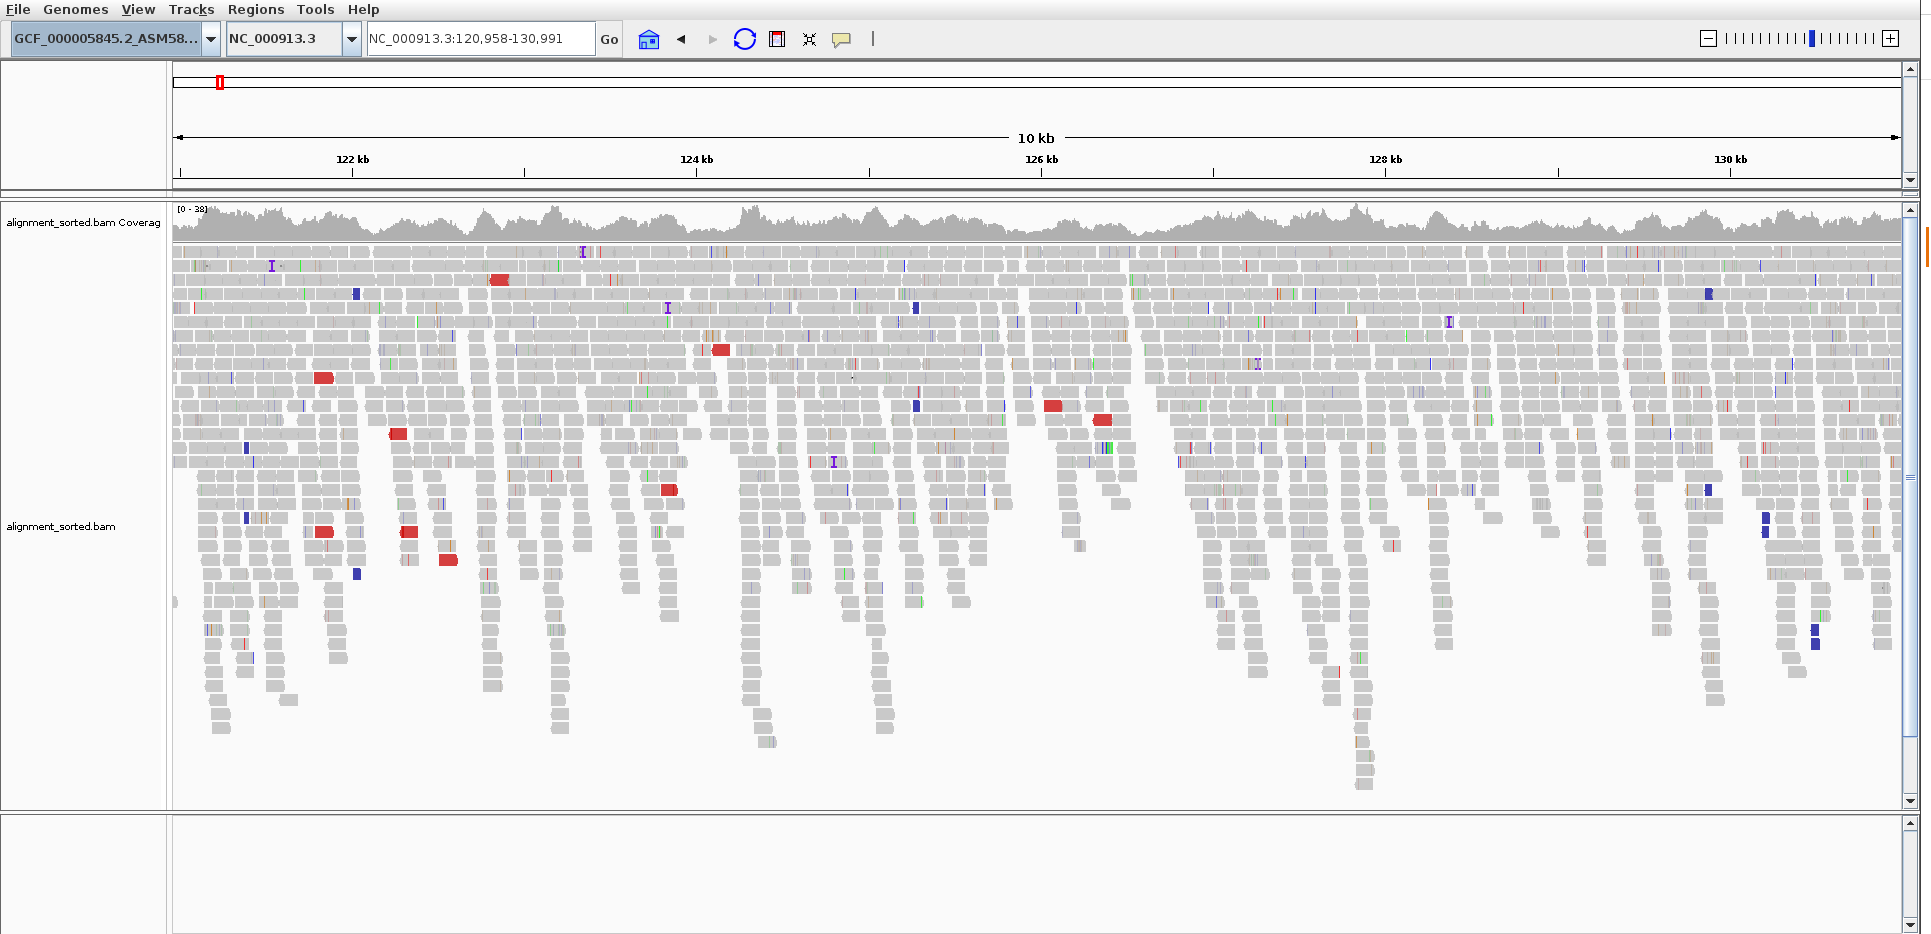

# 6. Variant calling

In [19]:
!samtools mpileup -f /content/Project1/raw/GCF_000005845.2_ASM584v2_genomic.fna alignment_sorted.bam >  my.mpileup

[mpileup] 1 samples in 1 input files


In [20]:
!wget https://github.com/dkoboldt/varscan/raw/master/VarScan.v2.4.0.jar

--2023-02-28 08:52:04--  https://github.com/dkoboldt/varscan/raw/master/VarScan.v2.4.0.jar
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dkoboldt/varscan/master/VarScan.v2.4.0.jar [following]
--2023-02-28 08:52:05--  https://raw.githubusercontent.com/dkoboldt/varscan/master/VarScan.v2.4.0.jar
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 112426 (110K) [application/octet-stream]
Saving to: ‘VarScan.v2.4.0.jar’

VarScan.v2.4.0.jar  100%[===================>] 109.79K  --.-KB/s    in 0.02s   

2023-02-28 08:52:05 (4.87 MB/s) - ‘VarScan.v2.4.0.jar’ saved [112426/112426]



In [21]:
!java -jar VarScan.v2.4.0.jar mpileup2snp -h

Only SNPs will be reported
Min coverage:	8
Min reads2:	2
Min var freq:	0.2
Min avg qual:	15
P-value thresh:	0.01
USAGE: java -jar VarScan.jar mpileup2cns [pileup file] OPTIONS
	mpileup file - The SAMtools mpileup file

	OPTIONS:
	--min-coverage	Minimum read depth at a position to make a call [8]
	--min-reads2	Minimum supporting reads at a position to call variants [2]
	--min-avg-qual	Minimum base quality at a position to count a read [15]
	--min-var-freq	Minimum variant allele frequency threshold [0.01]
	--min-freq-for-hom	Minimum frequency to call homozygote [0.75]
	--p-value	Default p-value threshold for calling variants [99e-02]
	--strand-filter	Ignore variants with >90% support on one strand [1]
	--output-vcf	If set to 1, outputs in VCF format
	--vcf-sample-list	For VCF output, a list of sample names in order, one per line
	--variants	Report only variant (SNP/indel) positions [0]


In [22]:
!java -jar VarScan.v2.4.0.jar  mpileup2snp my.mpileup --min-var-freq 0.5 --variants --output-vcf 1 > VarScan_results.vcf

Only SNPs will be reported
Min coverage:	8
Min reads2:	2
Min var freq:	0.5
Min avg qual:	15
P-value thresh:	0.01
Reading input from my.mpileup
4641343 bases in pileup file
9 variant positions (6 SNP, 3 indel)
1 were failed by the strand-filter
5 variant positions reported (5 SNP, 0 indel)


# 7. Variant effect prediction

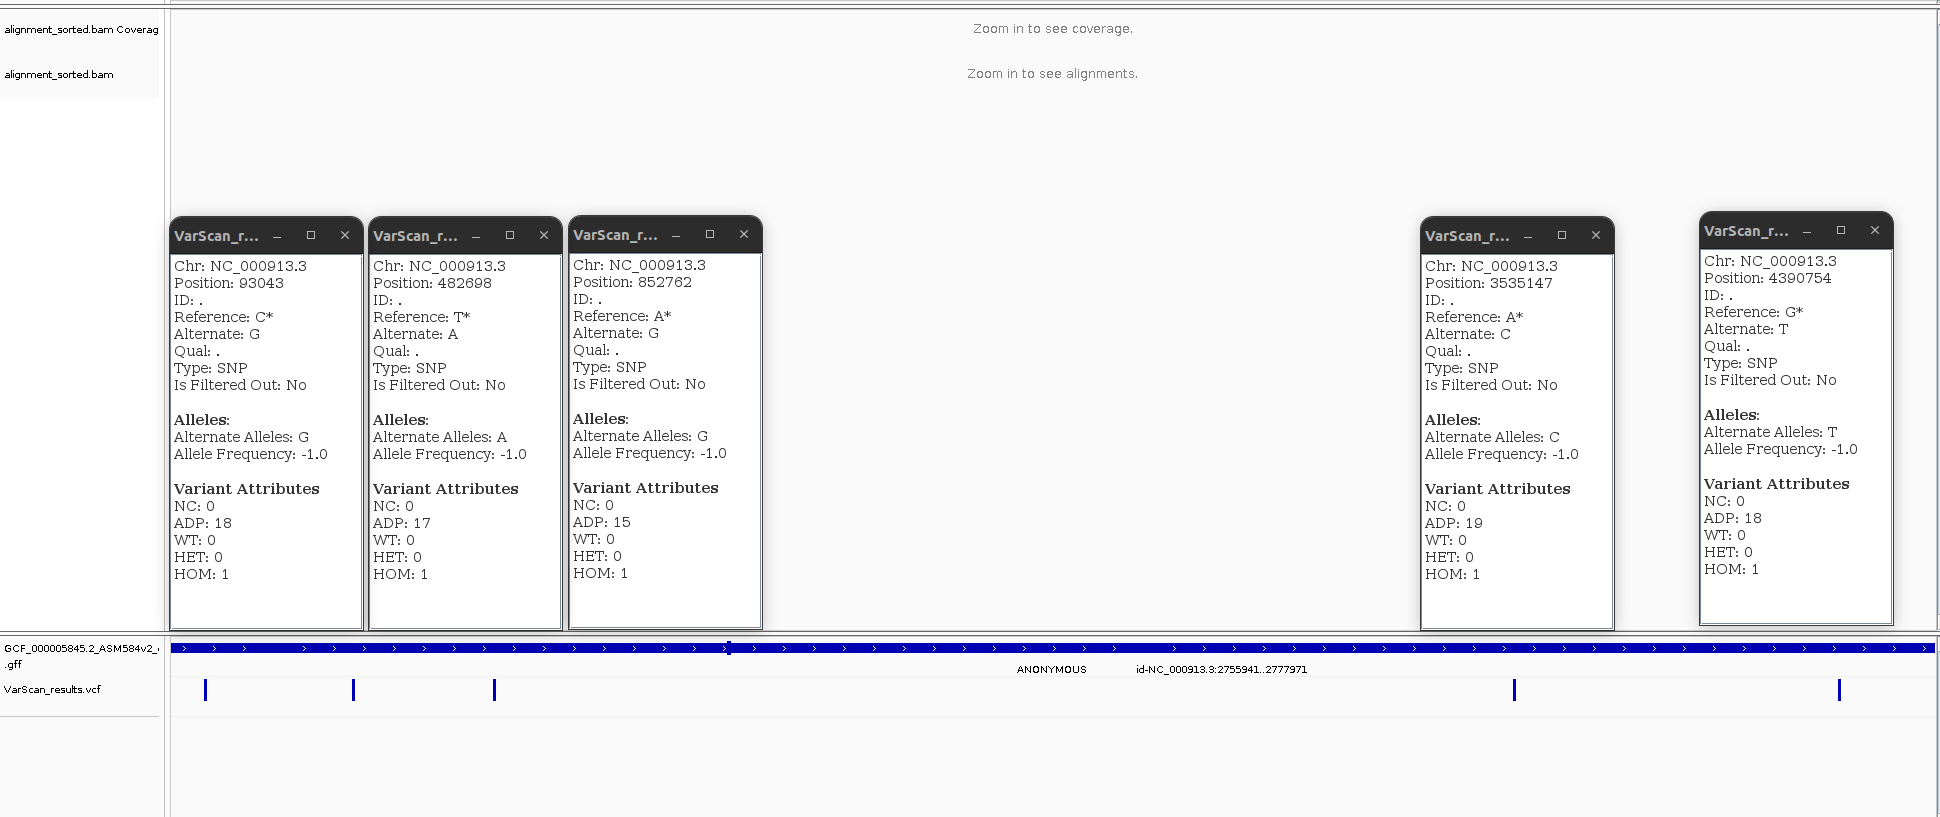

## 7.1 ADDENDUM Automatic SNP annotation


In [23]:
!wget https://snpeff.blob.core.windows.net/versions/snpEff_latest_core.zip
!unzip snpEff_latest_core.zip




--2023-02-28 08:54:17--  https://snpeff.blob.core.windows.net/versions/snpEff_latest_core.zip
Resolving snpeff.blob.core.windows.net (snpeff.blob.core.windows.net)... 52.239.234.228
Connecting to snpeff.blob.core.windows.net (snpeff.blob.core.windows.net)|52.239.234.228|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 67191760 (64M) [application/zip]
Saving to: ‘snpEff_latest_core.zip’

snpEff_latest_core. 100%[===================>]  64.08M  43.3MB/s    in 1.5s    

2023-02-28 08:54:19 (43.3 MB/s) - ‘snpEff_latest_core.zip’ saved [67191760/67191760]

Archive:  snpEff_latest_core.zip
   creating: snpEff/
  inflating: snpEff/LICENSE.md       
  inflating: snpEff/snpEff.jar       
  inflating: snpEff/SnpSift.jar      
   creating: snpEff/galaxy/
  inflating: snpEff/galaxy/snpSift_int.xml  
   creating: snpEff/galaxy/tool-data/
  inflating: snpEff/galaxy/tool-data/snpEff_genomes.loc  
  inflating: snpEff/galaxy/tool-data/snpEff_genomes.loc.sample  
  inflating: snp

In [24]:
!echo "k12.genome : ecoli_K12" > /content/Project1/snpEff/snpEff.config
%cd /content/Project1/snpEff
!mkdir -p data/k12
%cd data/k12
!wget https://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000/005/845/GCF_000005845.2_ASM584v2/GCF_000005845.2_ASM584v2_genomic.gbff.gz
!gunzip GCF_000005845.2_ASM584v2_genomic.gbff.gz

/content/Project1/snpEff
/content/Project1/snpEff/data/k12
--2023-02-28 08:54:21--  https://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000/005/845/GCF_000005845.2_ASM584v2/GCF_000005845.2_ASM584v2_genomic.gbff.gz
Resolving ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)... 165.112.9.230, 130.14.250.7, 2607:f220:41e:250::7, ...
Connecting to ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)|165.112.9.230|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3421587 (3.3M) [application/x-gzip]
Saving to: ‘GCF_000005845.2_ASM584v2_genomic.gbff.gz’

GCF_000005845.2_ASM 100%[===================>]   3.26M  10.0MB/s    in 0.3s    

2023-02-28 08:54:23 (10.0 MB/s) - ‘GCF_000005845.2_ASM584v2_genomic.gbff.gz’ saved [3421587/3421587]



In [25]:
!mv GCF_000005845.2_ASM584v2_genomic.gbff genes.gbk

In [26]:
%cd /content/Project1/snpEff
!java -jar snpEff.jar build -genbank -v k12

/content/Project1/snpEff
00:00:00 SnpEff version SnpEff 5.1d (build 2022-04-19 15:49), by Pablo Cingolani
00:00:00 Command: 'build'
00:00:00 Building database for 'k12'
00:00:00 Reading configuration file 'snpEff.config'. Genome: 'k12'
00:00:00 Reading config file: /content/Project1/snpEff/snpEff.config
00:00:00 done
00:00:01 Chromosome: 'NC_000913.3'	length: 4641652
00:00:01 Create exons from CDS (if needed): 
.........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

In [27]:
!java -jar snpEff.jar ann k12 ../VarScan_results.vcf > ../VarScan_results_annotated.vcf